In [17]:
import numpy as np
from core.tensor import Tensor
from nn.loss import cross_entropy
from nn.linear import Linear
from nn.optim import SGD

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

batch_size = 128
train_dataset = MNIST("data/MNIST/", train=True, download=True, transform=ToTensor())
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True)

In [18]:
class Network:
    def __init__(self):
        self.input = Linear(28*28, 512)
        self.hidden = Linear(512, 128)
        self.out = Linear(128,10)

    def __call__(self, x):
        x = self.input(x).relu()
        x = self.hidden(x).relu()
        x = self.out(x)
        return x

    def parameters(self):
        return self.input.parameters() + self.hidden.parameters() + self.out.parameters()
    
    def zero_grad(self):
        for parameter in self.parameters():
            parameter.grad = np.zeros_like(parameter.grad)

In [19]:
model = Network()
optimizer = SGD(model.parameters(), lr=0.001)

In [20]:
losses = []

for epoch in range(5):
    for xs, ys in train_loader:
        xs = Tensor(xs.reshape(batch_size, -1).numpy())
        targets = np.eye(10)[ys]

        x = model(xs)
        loss = cross_entropy(x, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)

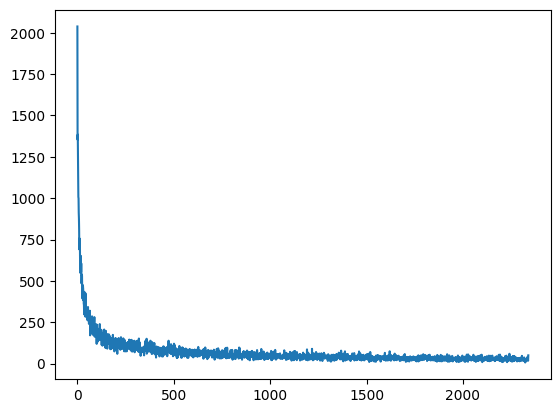

In [21]:
plt.plot(losses)